## Introduction and Imports

In [4]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import plotly.express as px
import warnings

In [5]:
# import dataset
train = pd.read_csv('./widsdatathon2022/train.csv')
test = pd.read_csv('./widsdatathon2022/test.csv')


In [6]:
# viewing top rows of data of train
train.head()

Year_Factor State_Factor building_class  ... days_with_fog    site_eui   id
0            1      State_1     Commercial  ...           NaN  248.682615  0.0
1            1      State_1     Commercial  ...          12.0   26.500150  1.0
2            1      State_1     Commercial  ...          12.0   24.693619  2.0
3            1      State_1     Commercial  ...          12.0   48.406926  3.0
4            1      State_1     Commercial  ...           NaN    3.899395  4.0

[5 rows x 64 columns]

In [7]:
# viewing summary of the dataset
train.describe()

Year_Factor    floor_area  ...      site_eui            id
count  14919.000000  1.491900e+04  ...  14918.000000  14918.000000
mean       4.637107  2.015668e+05  ...     77.322339   7458.500000
std        1.351222  3.107668e+05  ...     62.664591   4306.599993
min        1.000000  9.430000e+02  ...      1.196721      0.000000
25%        4.000000  5.470000e+04  ...     45.591188   3729.250000
50%        5.000000  1.013760e+05  ...     66.205316   7458.500000
75%        6.000000  2.337920e+05  ...     89.904627  11187.750000
max        6.000000  5.634890e+06  ...    970.388586  14917.000000

[8 rows x 61 columns]

In [8]:
# viewing the details about rows and columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14919 entries, 0 to 14918
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                14919 non-null  int64  
 1   State_Factor               14919 non-null  object 
 2   building_class             14919 non-null  object 
 3   facility_type              14919 non-null  object 
 4   floor_area                 14919 non-null  float64
 5   year_built                 13911 non-null  float64
 6   energy_star_rating         11100 non-null  float64
 7   ELEVATION                  14919 non-null  float64
 8   january_min_temp           14919 non-null  int64  
 9   january_avg_temp           14919 non-null  float64
 10  january_max_temp           14919 non-null  int64  
 11  february_min_temp          14919 non-null  int64  
 12  february_avg_temp          14919 non-null  float64
 13  february_max_temp          14919 non-null  int

In [9]:
# fix any missing value or incorrect value
train.isna().sum()

Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
                             ...  
direction_peak_wind_speed    13296
max_wind_speed               13258
days_with_fog                11812
site_eui                         1
id                               1
Length: 64, dtype: int64

### Exploratory Data Analysis 

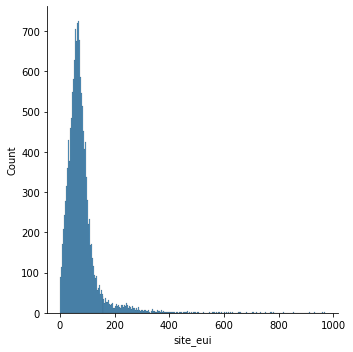

In [10]:
# distribution of target variable
sns.displot(train['site_eui']);


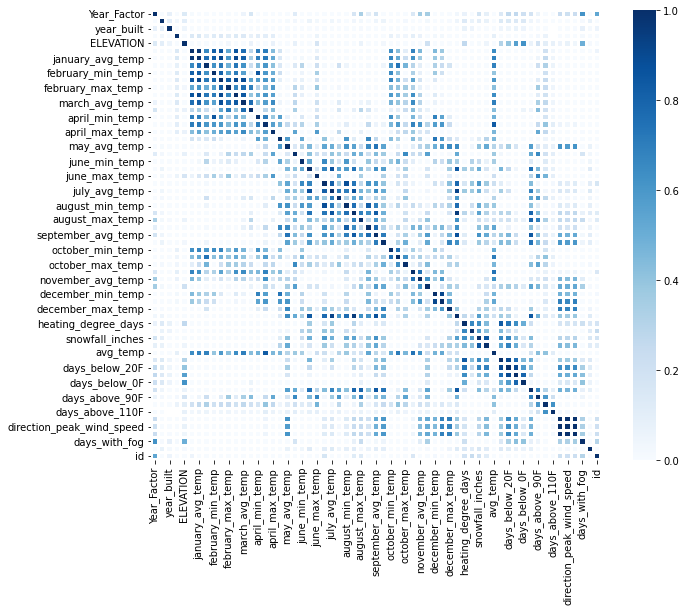

In [ ]:
# correlation among variables
corr = train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(corr, vmin=0, vmax=1, linewidths=2, square=True, cmap='Blues')

In [ ]:

fig = px.histogram(train, x='site_eui', color='Year_Factor')
fig.update_layout(title_text='Year wise distribution of site energy usage', title_x=0.5, title_y=1, margin=dict(t=30, l=30, r=30, b=30))
fig.show()

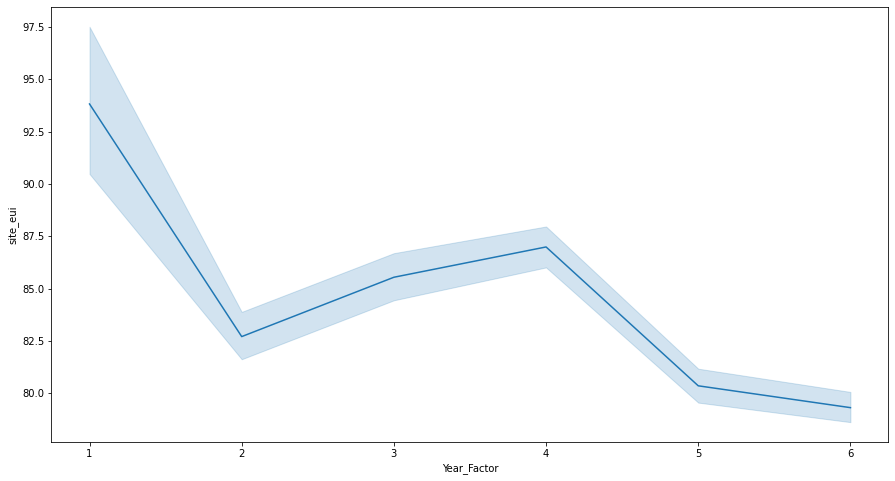

In [ ]:
# energy consumption over the years
plt.figure(figsize = (15,8))
sns.lineplot(x='Year_Factor', y='site_eui', data=train)

In [ ]:
fig = px.scatter(train.query('site_eui <= 200'), x="precipitation_inches", y="site_eui", trendline="ols")
fig.update_layout(title_text='Precipitation wr.t site eui', title_x=0.5, title_y=1, margin=dict(t=30, l=30, r=30, b=30))
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
temp_min = train[['State_Factor','january_min_temp', 'february_min_temp', 'march_min_temp', 'april_min_temp',
       'may_min_temp', 'june_min_temp', 'july_min_temp', 'august_min_temp', 'september_min_temp',
       'october_min_temp', 'november_min_temp','december_min_temp']].set_index('State_Factor')
df_temp_min = temp_min.unstack().reset_index().rename(columns = {0:'temp_min', 'level_0': 'month'})

statewise_min_temp = df_temp_min.groupby(['month', 'State_Factor'])['temp_min'].agg('median').reset_index()

# parse the month column
month = ['january', 'february', 'march', 'april','may', 'june', 
         'july', 'august', 'september','october', 'november','december']
statewise_min_temp['month'] = statewise_min_temp['month'].apply(lambda x: x.split('_')[0])
statewise_min_temp['month'] = pd.Categorical(statewise_min_temp['month'], categories = month, ordered = True)
statewise_min_temp.sort_values(by = 'month', inplace=True)
# statewise min temperature
fig = px.line(statewise_min_temp, x="month", y="temp_min", color = 'State_Factor')
fig.update_layout(title_text='Statewise yearly minimum temperature trend', title_x=0.5, title_y=1, margin=dict(t=30, l=30, r=30, b=30))
fig.show()

In [ ]:
temp_max = train[['State_Factor','january_max_temp', 'february_max_temp', 'march_max_temp', 'april_max_temp',
       'may_max_temp', 'june_max_temp', 'july_max_temp', 'august_max_temp', 'september_max_temp',
       'october_max_temp', 'november_max_temp','december_max_temp']].set_index('State_Factor')
df_temp_max = temp_max.unstack().reset_index().rename(columns = {0:'temp_max', 'level_0': 'month'})

statewise_max_temp = df_temp_max.groupby(['month', 'State_Factor'])['temp_max'].agg('median').reset_index()

# parse the month column
month = ['january', 'february', 'march', 'april','may', 'june', 
         'july', 'august', 'september','october', 'november','december']
statewise_max_temp['month'] = statewise_max_temp['month'].apply(lambda x: x.split('_')[0])
statewise_max_temp['month'] = pd.Categorical(statewise_max_temp['month'], categories = month, ordered = True)
statewise_max_temp.sort_values(by = 'month', inplace=True)

# state wise max temp trend
fig = px.line(statewise_max_temp, x="month", y="temp_max", color = 'State_Factor')
fig.update_layout(title_text='Statewise yearly max temperature trend', title_x=0.5, title_y=1, margin=dict(t=30, l=30, r=30, b=30))
fig.show()

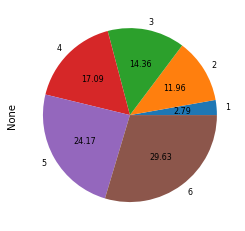

In [ ]:
# year factor piechart
train.groupby('Year_Factor').size().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 8})

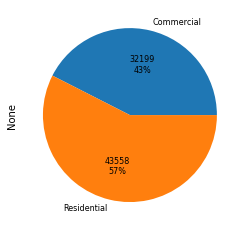

In [ ]:
# state factor piechart
def label_function(val):
    return f'{val / 100 * len(train):.0f}\n{val:.0f}%'

train.groupby('building_class').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 8})

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

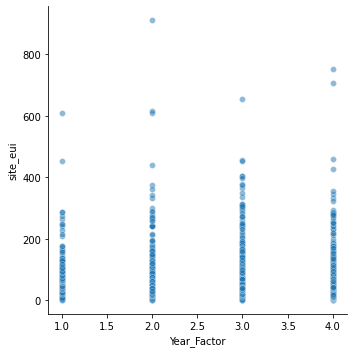

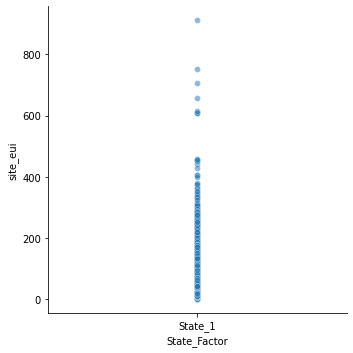

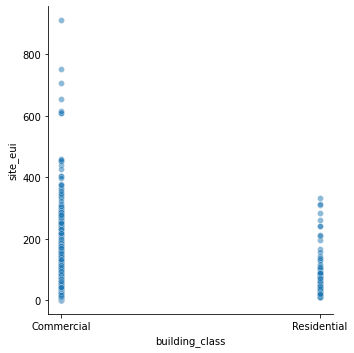

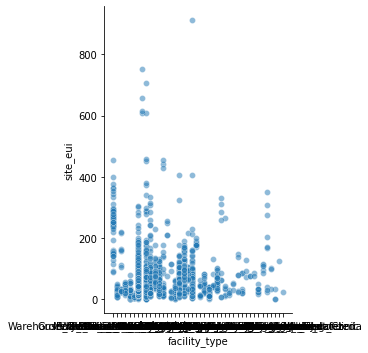

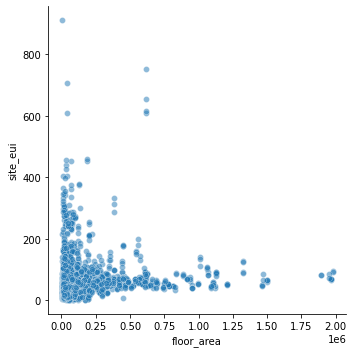

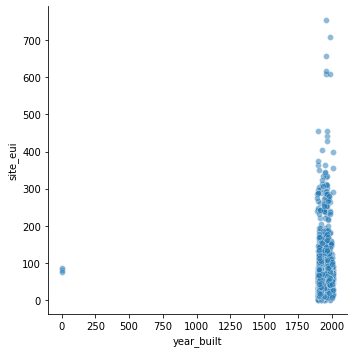

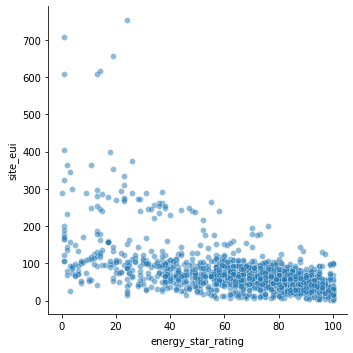

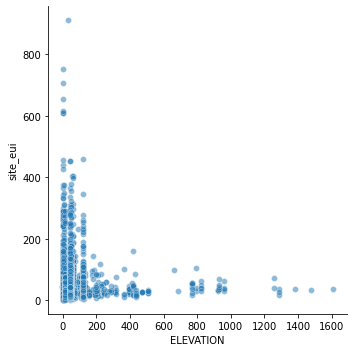

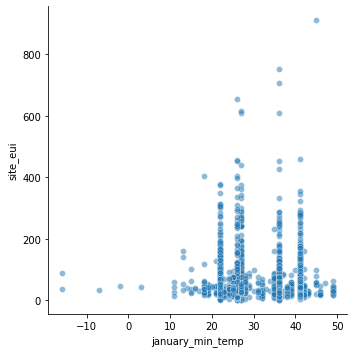

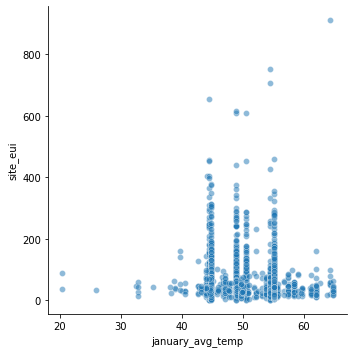

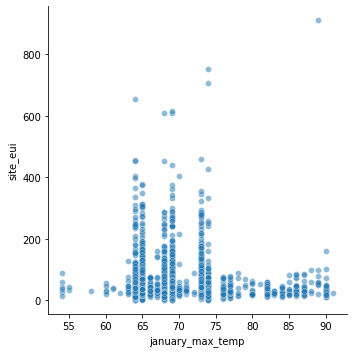

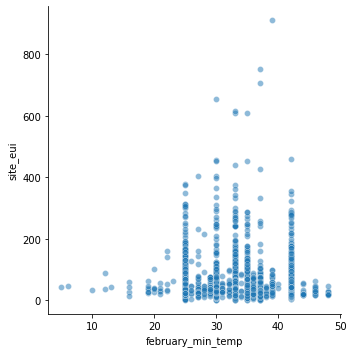

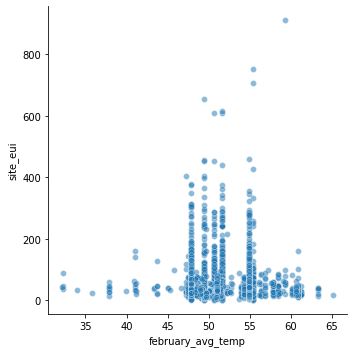

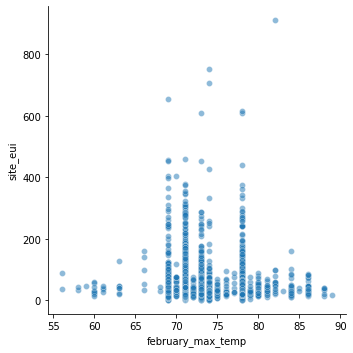

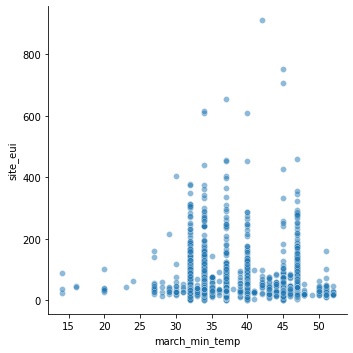

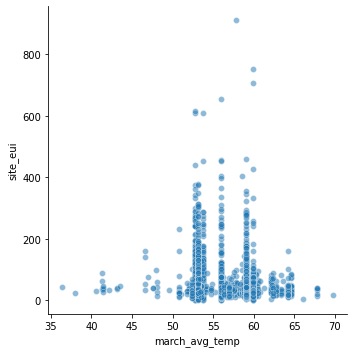

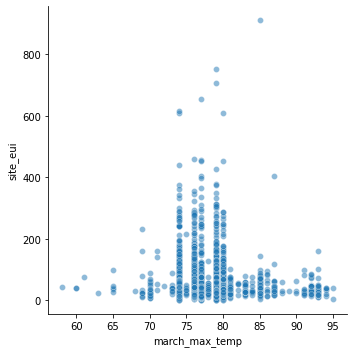

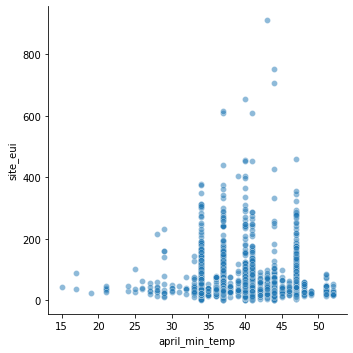

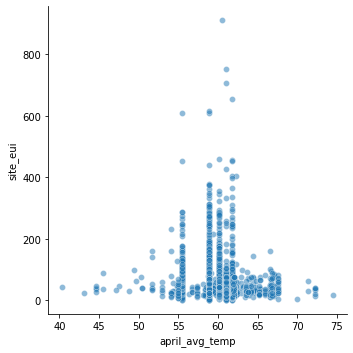

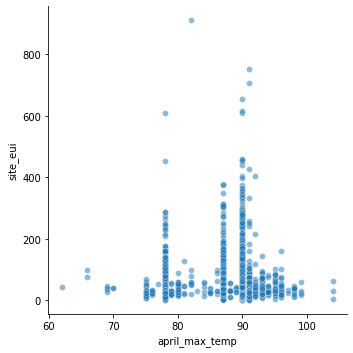

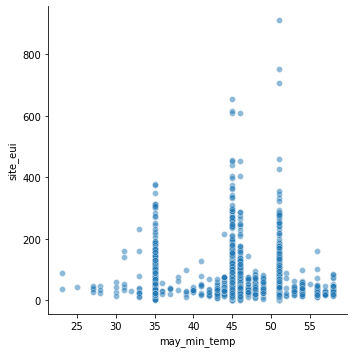

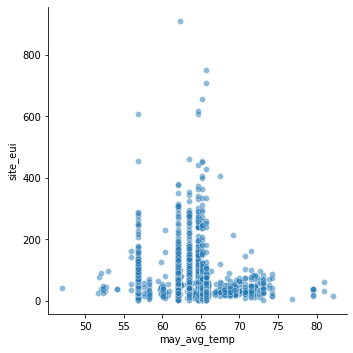

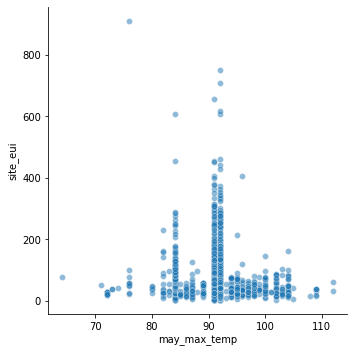

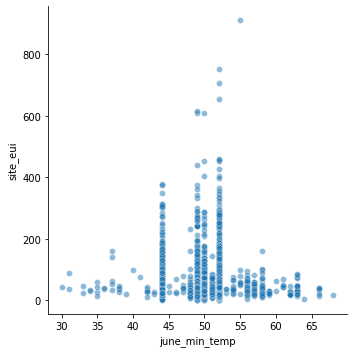

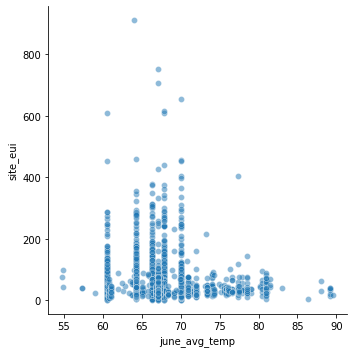

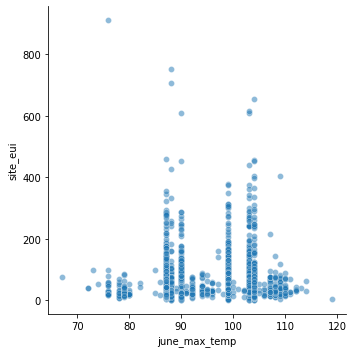

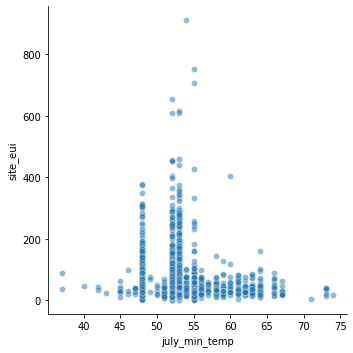

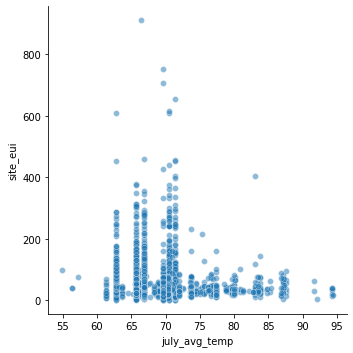

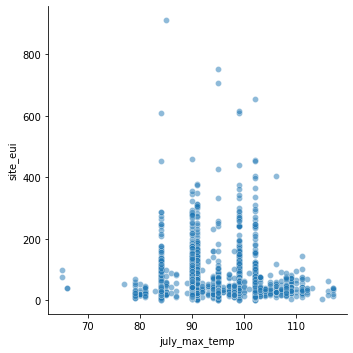

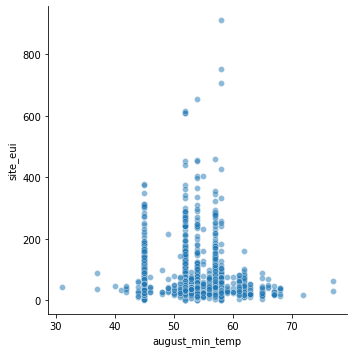

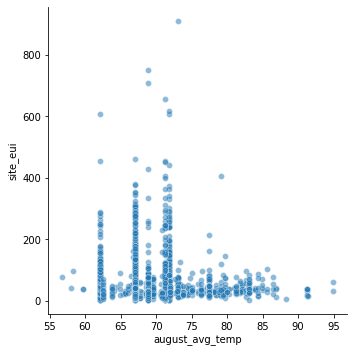

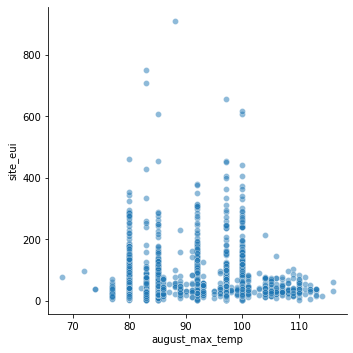

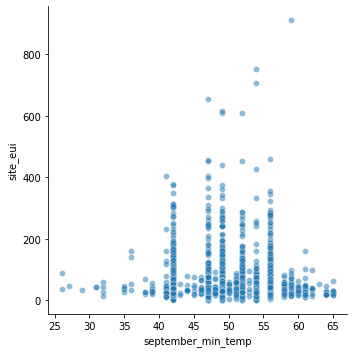

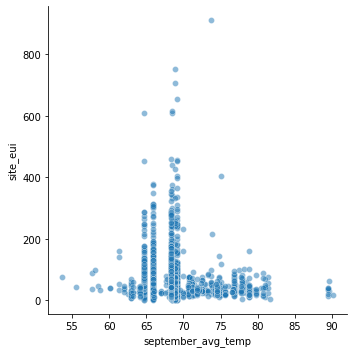

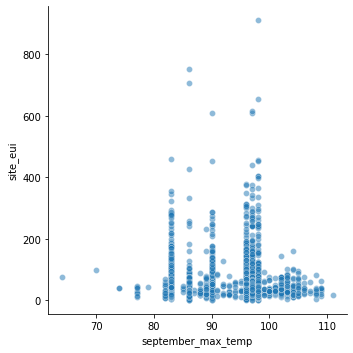

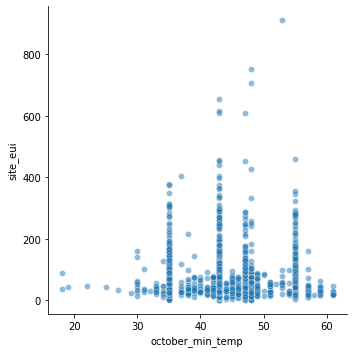

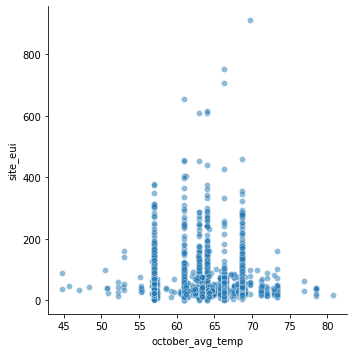

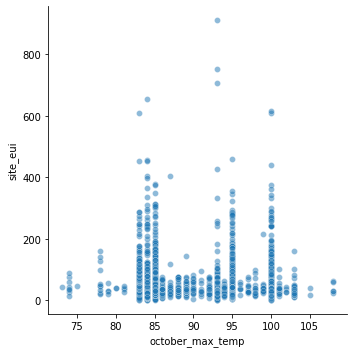

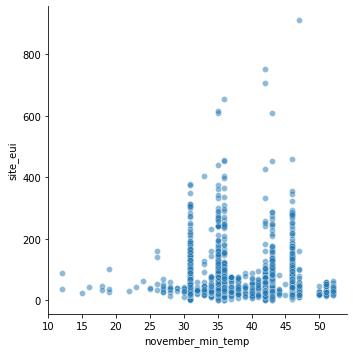

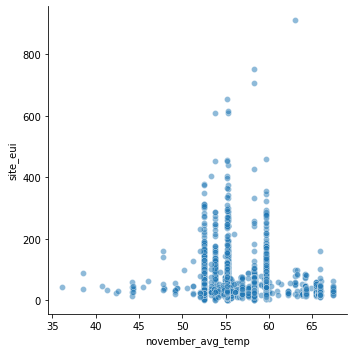

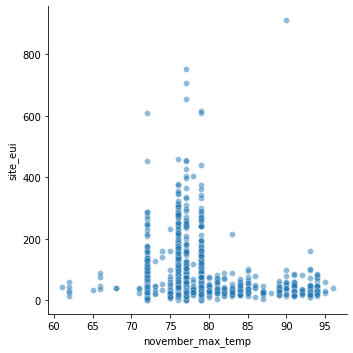

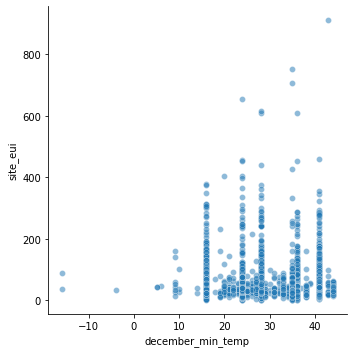

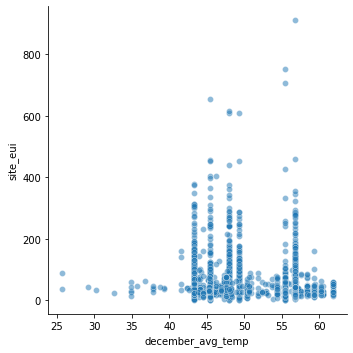

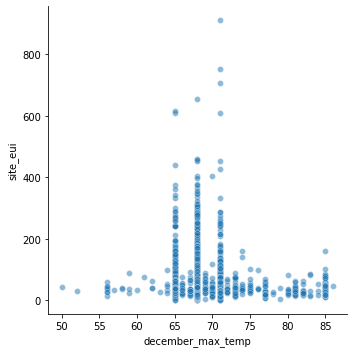

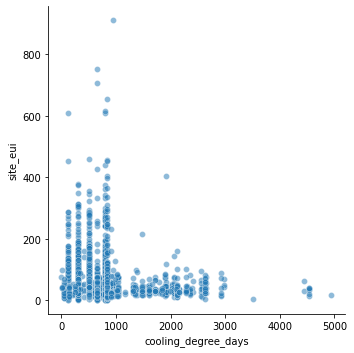

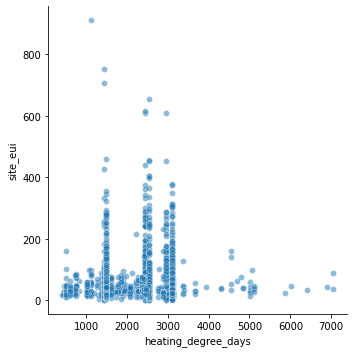

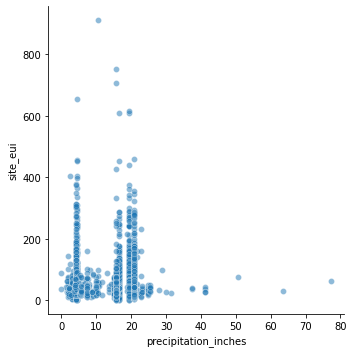

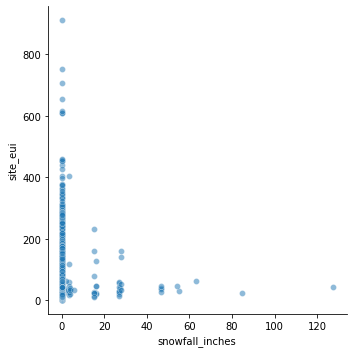

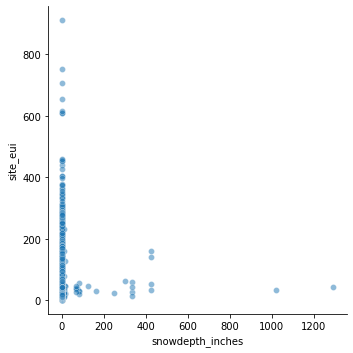

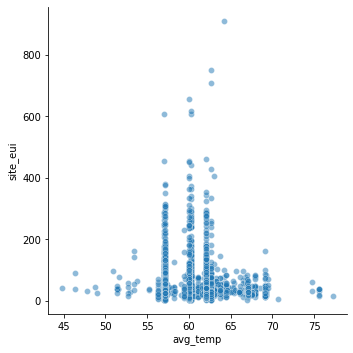

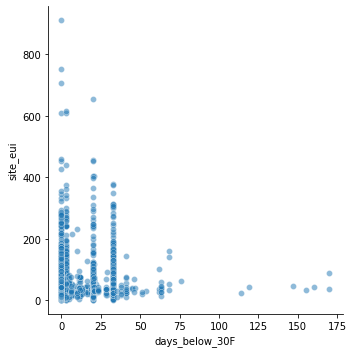

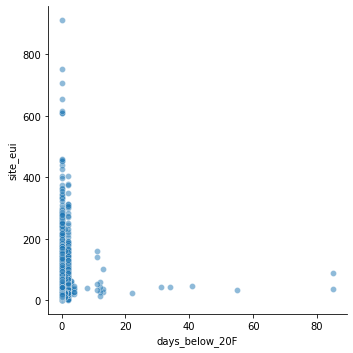

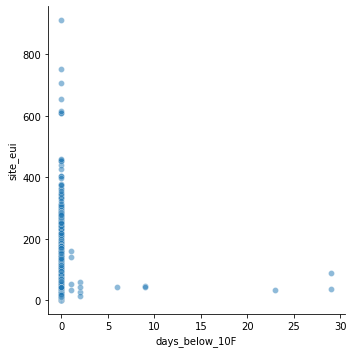

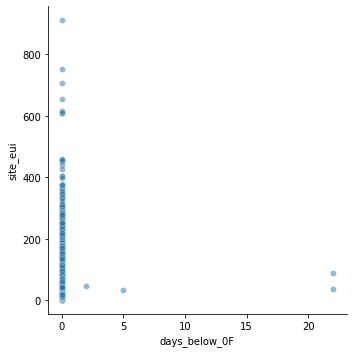

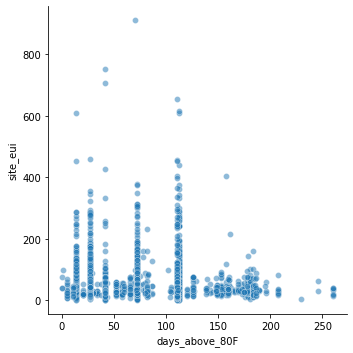

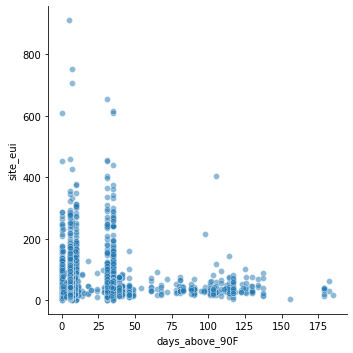

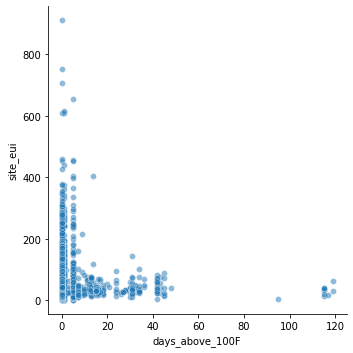

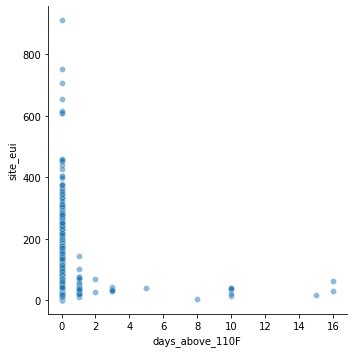

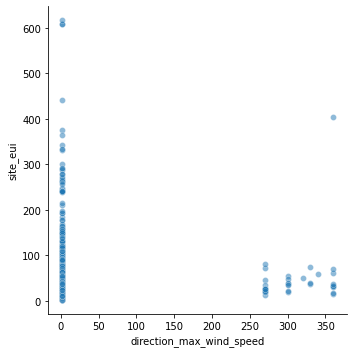

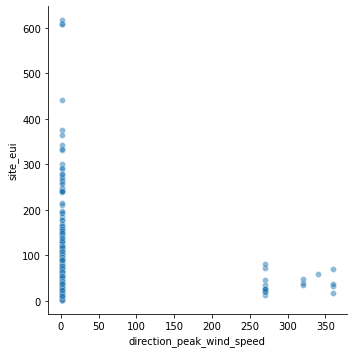

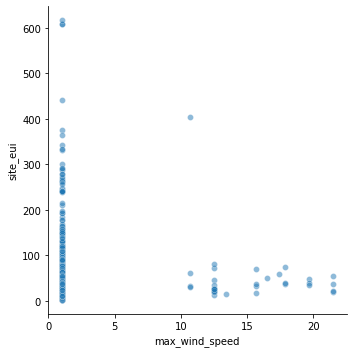

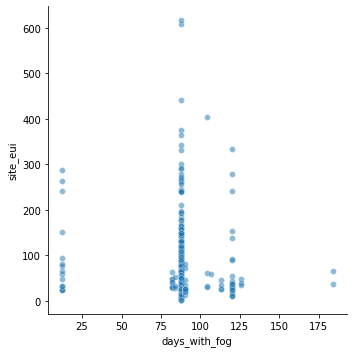

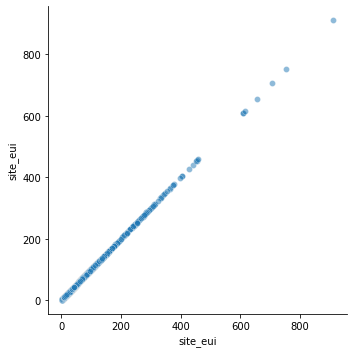

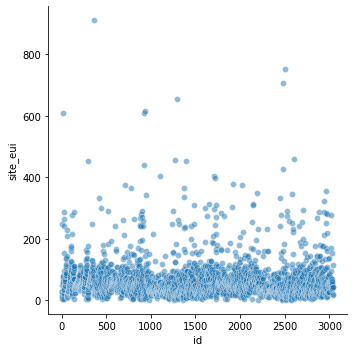

In [ ]:
#looping through each column for visuali 
for (columnName, columnData) in train.iteritems():
    sns.relplot(data = train, x = columnName, y = 'site_eui', sizes=(10, 200), alpha = 0.5)

No handles with labels found to put in legend.


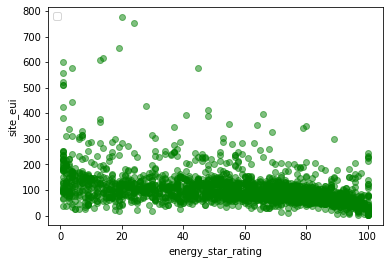

In [ ]:
# scatter plot to see correlation between year and site_eui
plt.scatter(train.loc[train['floor_area'] > 0.5 * 1000000, 'energy_star_rating'], train.loc[train['floor_area'] > 0.5 * 1000000, 'site_eui'], c="g", alpha=0.5)
plt.xlabel("energy_star_rating")
plt.ylabel("site_eui")
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


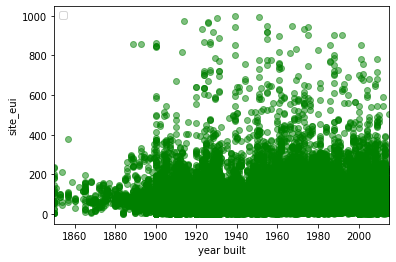

In [ ]:
# scatter plot to see correlation between year built and site_eui
plt.scatter(train['year_built'], train['site_eui'], c="g", alpha=0.5)
plt.xlabel("year built")
plt.ylabel("site_eui")
plt.xlim(1850, 2015)
plt.legend(loc='upper left')
plt.show()

No handles with labels found to put in legend.


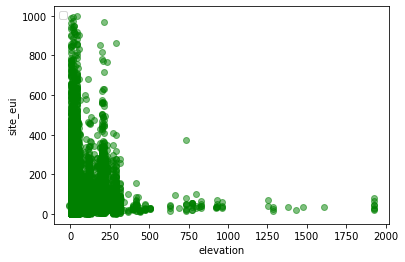

In [ ]:
# scatter plot to see correlation between elevation and site_eui
plt.scatter(train['ELEVATION'], train['site_eui'], c="g", alpha=0.5)
plt.xlabel("elevation")
plt.ylabel("site_eui")
plt.legend(loc='upper left')
plt.show()

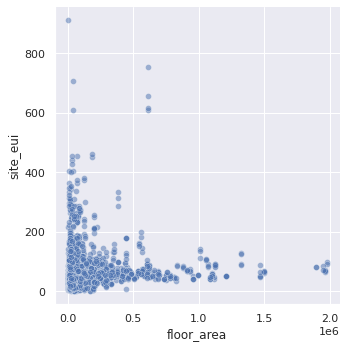

In [ ]:
# floor area and site_eui
sns.set_theme()
sns.relplot(data = train, x = 'floor_area', y = 'site_eui', sizes=(10, 200), alpha = 0.5)

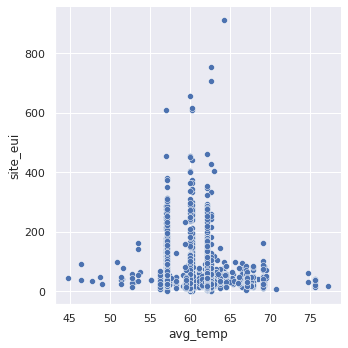

In [ ]:
#avg temp and site eui
sns.relplot(data = train, x = 'avg_temp', y = 'site_eui', sizes=(10, 200), palette = 'muted')

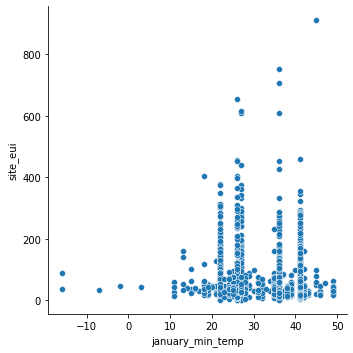

In [ ]:
#Jan min temp and site eui
sns.relplot(data = train, x = 'january_min_temp', y = 'site_eui', sizes=(10, 200))

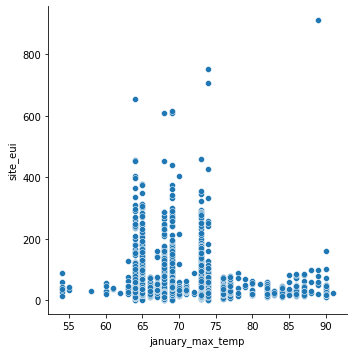

In [ ]:
#Jan max temp and site eui
sns.relplot(data = train, x = 'january_max_temp', y = 'site_eui', sizes=(10, 200))

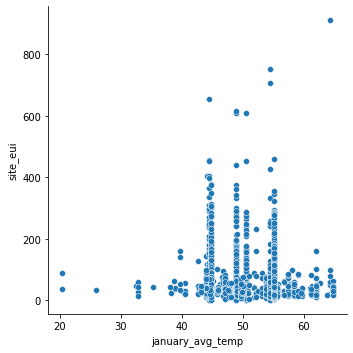

In [ ]:
#Jan avg temp and site eui
sns.relplot(data = train, x = 'january_avg_temp', y = 'site_eui', sizes=(10, 200))

In [ ]:
def plotting(month):
  
sns.relplot(data = train, x = 'january_avg_temp', y = 'site_eui', sizes=(10, 200))

In [ ]:

for i in range(64):
  if((train.isna().sum())[i])>0:
    print(i,train.isna().sum()[i])

5 1837
6 26709
58 41082
59 41811
60 41082
61 45796
